# DSCI 503 - Homework 05
### Nathan Stratford

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1: Working wth 2D Arrays

In [4]:
np.random.seed(1)
Z = np.random.uniform(0, 10, (5, 8))
Z = np.round(Z, 2)
print(Z)

[[4.17 7.2  0.   3.02 1.47 0.92 1.86 3.46]
 [3.97 5.39 4.19 6.85 2.04 8.78 0.27 6.7 ]
 [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
 [8.76 8.95 0.85 0.39 1.7  8.78 0.98 4.21]
 [9.58 5.33 6.92 3.16 6.87 8.35 0.18 7.5 ]]


In [5]:
print(f"Row 3: {Z[2]}")
print(f"Column 6: {Z[2][5]}")

Row 3: [4.17 5.59 1.4  1.98 8.01 9.68 3.13 6.92]
Column 6: 9.68


In [6]:
row_sums = np.sum(Z, axis=1)
col_sums = np.sum(Z, axis=0)
array_sum = np.sum(Z)
print("Row Sums:")
print(row_sums)
print("Column Sums:", col_sums)
print("Array Sum:", array_sum)

Row Sums:
[22.1  38.19 40.88 34.62 47.89]
Column Sums: [30.65 32.46 13.36 15.4  20.09 36.51  6.42 28.79]
Array Sum: 183.68


## Problem 2: Reshaping and Stacking Arrays

In [7]:
np.random.seed(167)
x1 = np.random.normal(50, 10, 1000)  
x2 = np.random.normal(20, 5, 1000) 
x3 = np.random.normal(100, 30, 1000)
x4 = np.random.normal(10, 2, 1000)   
X = np.hstack([x1.reshape(-1, 1), x2.reshape(-1, 1), x3.reshape(-1, 1), x4.reshape(-1, 1)])
X = np.round(X, 2)
print(X.shape)

(1000, 4)


In [8]:
print(X[:6])

[[ 37.08  16.71 138.06   8.89]
 [ 41.32  19.91  99.61   9.86]
 [ 63.15  14.43  70.08  11.6 ]
 [ 50.03  12.71  95.05   8.47]
 [ 55.05  24.4   62.16   9.49]
 [ 59.24  25.68  64.57  12.84]]


# Problem 3: Standardization

In [9]:
col_mean_array = np.mean(X, axis=0)
col_std_devs_array = np.std(X, axis=0)
print("Column means:")
print(np.round(col_mean_array, 2))
print("Column standard deviations:")
print(np.round(col_std_devs_array, 2))

Column means:
[50.21 19.86 99.84 10.06]
Column standard deviations:
[ 9.69  5.08 30.88  2.03]


In [10]:
W = (X - col_mean_array) / col_std_devs_array
W_col_mean = np.mean(W, axis=0)
W_col_std_dev = np.std(W, axis=0)
print("Column means:")
print(np.round(W_col_mean, 2))
print("Column standard deviations:")
print(np.round(W_col_std_dev, 2))

Column means:
[ 0. -0. -0. -0.]
Column standard deviations:
[1. 1. 1. 1.]


## Problem 4: Load Auto MPG Dataset

In [11]:
auto = pd.read_csv('auto_mpg.txt', sep='\t')
auto.head(10)
auto.shape
auto.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of       mpg  cyl    wt region                      model
0    27.2    4  3190    eur                peugeot 504
1    32.8    4  1985   asia           mazda glc deluxe
2    18.1    6  3410    usa            amc concord d/l
3    17.5    8  4080    usa            dodge magnum xe
4    25.4    5  3530    eur         mercedes benz 300d
..    ...  ...   ...    ...                        ...
393  22.0    6  2835    usa             ford granada l
394  27.0    4  2790    usa            ford mustang gl
395  24.5    4  2740    usa      pontiac sunbird coupe
396  18.0    8  3504    usa  chevrolet chevelle malibu
397  32.4    4  2290   asia               honda accord

[398 rows x 5 columns]>

## Problem 5: Regional Counts and Means

In [12]:
regions = np.unique(auto['region'])
print(regions)
asia_auto = auto[auto['region'] == 'asia']
eur_auto = auto[auto['region'] == 'eur']
usa_auto = auto[auto['region'] == 'usa']
print(f"Number of cars manufactured in Asia:   {len(asia_auto):<10}")
print(f"Number of cars manufactured in Europe: {len(eur_auto):<10}")
print(f"Number of cars manufactured in USA:    {len(usa_auto):<10}")


['asia' 'eur' 'usa']
Number of cars manufactured in Asia:   79        
Number of cars manufactured in Europe: 70        
Number of cars manufactured in USA:    249       


In [13]:
asia_means = np.mean(asia_auto[['mpg', 'cyl', 'wt']], axis=0)
eur_means = np.mean(eur_auto[['mpg', 'cyl', 'wt']], axis=0)
usa_means = np.mean(usa_auto[['mpg', 'cyl', 'wt']], axis=0)
mean_df = pd.DataFrame({
    'mpg': [asia_means[0], eur_means[0], usa_means[0]],
    'cyl': [asia_means[1], eur_means[1], usa_means[1]],
    'wt': [asia_means[2], eur_means[2], usa_means[2]]
}, index=['asia', 'eur', 'usa'])
mean_df

,mpg,cyl,wt
asia,30.450633,4.101266,2221.227848
eur,27.891429,4.157143,2423.300000
usa,20.083534,6.248996,3361.931727


## Problem 6: Average Weight and MPG by Region

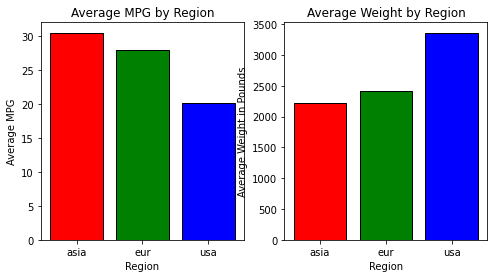

In [17]:
colors1 = ['red', 'green', 'blue']
fig, b(ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.bar(mean_df.index, mean_df['mpg'], color=colors1, edgecolor='black')
ax1.set_title('Average MPG by Region')
ax1.set_xlabel('Region')
ax1.set_ylabel('Average MPG')
ax2.bar(mean_df.index, mean_df['wt'], color=colors1, edgecolor='black')
ax2.set_title('Average Weight by Region')
ax2.set_xlabel('Region')
ax2.set_ylabel('Average Weight in Pounds')
plt.show()

## Problem 7: Relationship between Weight and Miles Per Gallon

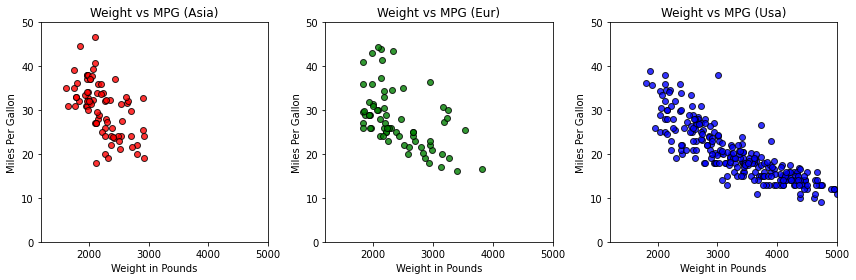

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Define regions list and corresponding colors for the scatter plot (same as in the bar charts).
regions = ['asia', 'eur', 'usa']
colors1 = ['red', 'green', 'blue']  # Tomato, SteelBlue, LimeGreen

# Step 2: Loop over the regions list and create subplots
for i, region in enumerate(regions):
    ax = axes[i]
    region_data = auto[auto['region'] == region]
    ax.scatter(region_data['wt'], region_data['mpg'], color=colors1[i], edgecolor='black', alpha=0.8)
    ax.set_xlim([1200, 5000])
    ax.set_ylim([0, 50])
    ax.set_xlabel('Weight in Pounds')
    ax.set_ylabel('Miles Per Gallon')
    ax.set_title(f'Weight vs MPG ({region.capitalize()})')
plt.tight_layout()
plt.show()

## Problem 8: Cylinder Distribution By Region

Unique cylinder values: [3 4 5 6 8]


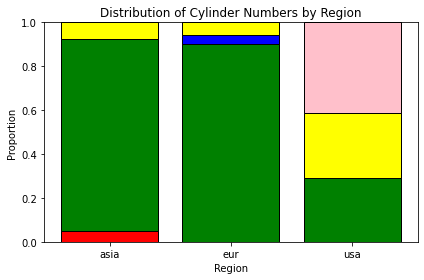

In [21]:
cyl_values = np.unique(auto['cyl'])
print("Unique cylinder values:", cyl_values)
cyl_counts_by_region = pd.crosstab(auto['cyl'], auto['region'])
cyl_counts_by_region
cyl_props_by_region = cyl_counts_by_region.div(cyl_counts_by_region.sum())
bar_bottoms = np.cumsum(cyl_props_by_region, axis=0) - cyl_props_by_region
colors2 = ['red', 'green', 'blue', 'yellow', 'pink'] 
fig, ax = plt.subplots(figsize=(6, 4))
for i, (index, row) in enumerate(cyl_props_by_region.iterrows()):
    ax.bar(cyl_props_by_region.columns, row, bottom=bar_bottoms.loc[index], color=colors2[i], edgecolor='black', label=f'{index} Cylinders')
ax.set_xlabel('Region')
ax.set_ylabel('Proportion')
ax.set_title('Distribution of Cylinder Numbers by Region')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()